# Análise Exploratória dos Dados de Aluguéis Temporários em Nova York
Este notebook contém uma análise exploratória dos dados de aluguéis temporários na cidade de Nova York. O objetivo é entender as principais características que influenciam os preços de aluguel e fornecer insights para potenciais investidores na plataforma de aluguéis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
df = pd.read_csv('teste_indicium_precificacao.csv')  # Substitua caminho_para_o_arquivo.csv pelo caminho correto do arquivo

# Configuração básica para visualizações
sns.set(style="whitegrid")

In [2]:
# Análise estatística básica
descricao_estatistica = df.describe()

descricao_estatistica

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


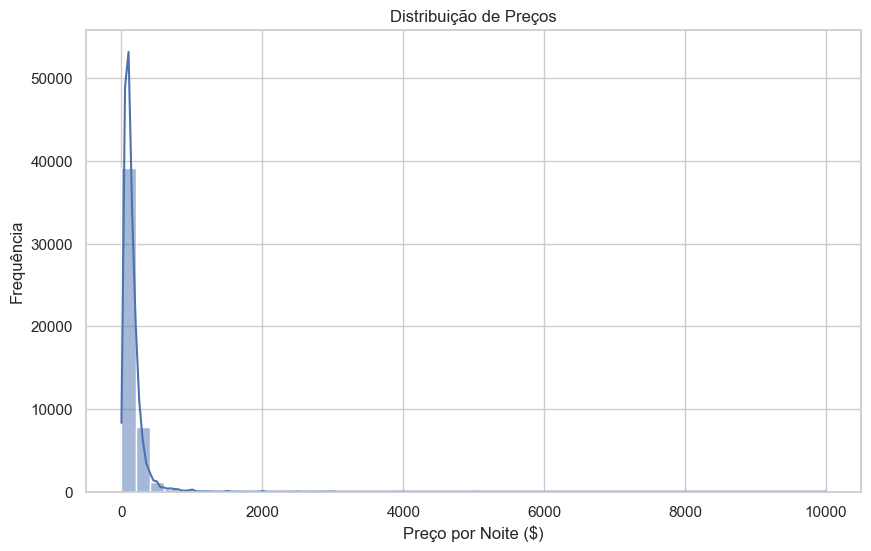

In [3]:
# Histograma de preços
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribuição de Preços')
plt.xlabel('Preço por Noite ($)')
plt.ylabel('Frequência')
plt.show()

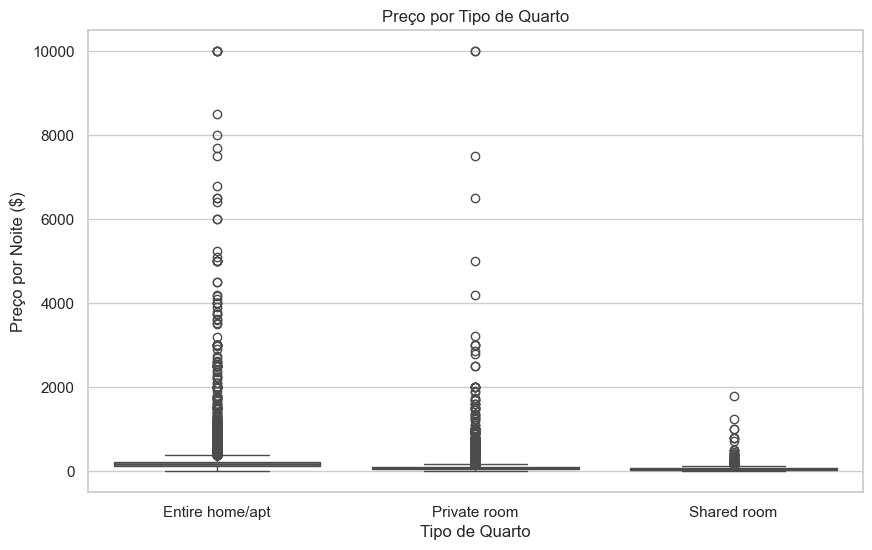

In [4]:
# Boxplot de preço por tipo de quarto
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Preço por Tipo de Quarto')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Preço por Noite ($)')
plt.show()

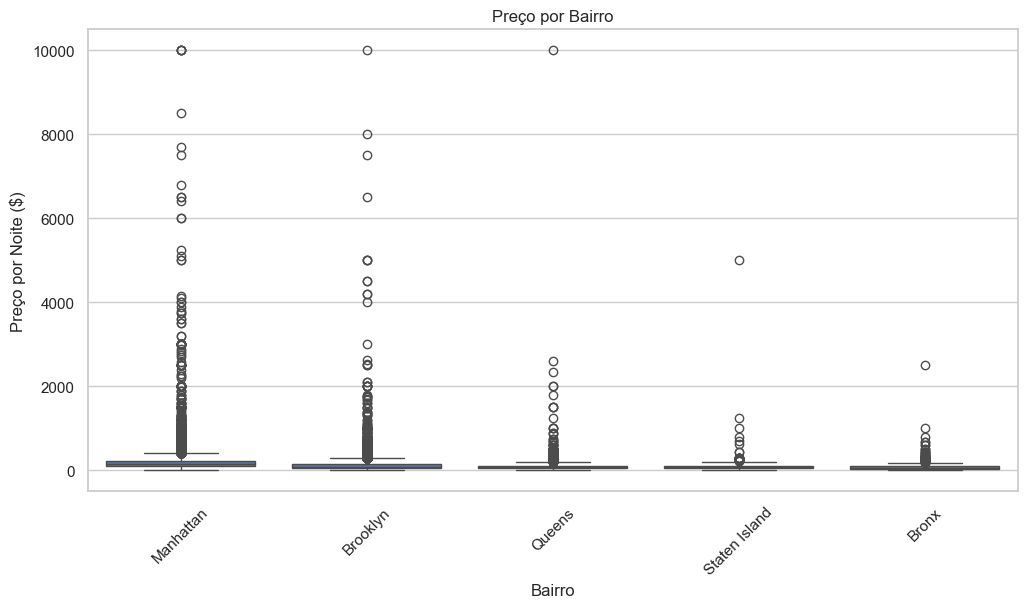

In [5]:
# Boxplot de preço por bairro_group
plt.figure(figsize=(12, 6))
sns.boxplot(x='bairro_group', y='price', data=df)
plt.title('Preço por Bairro')
plt.xlabel('Bairro')
plt.ylabel('Preço por Noite ($)')
plt.xticks(rotation=45)
plt.show()

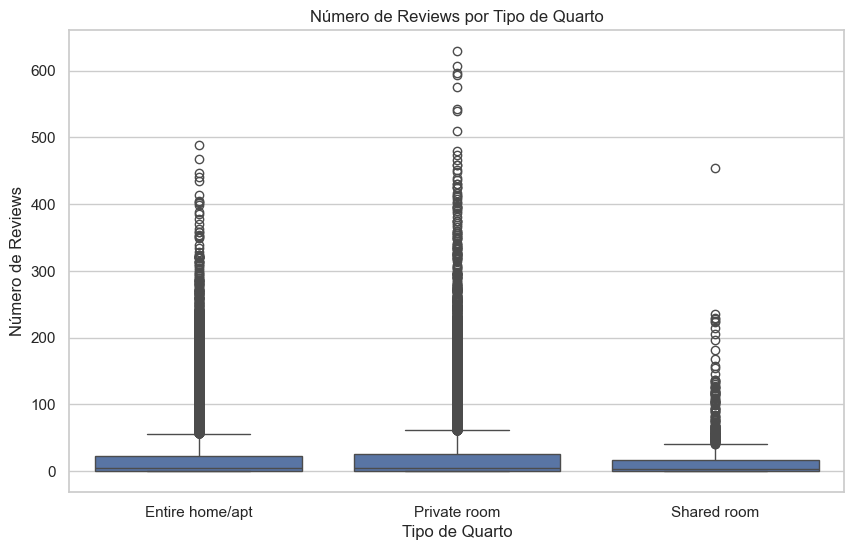

In [6]:
# Relação entre Tipo de Quarto e Número de Reviews
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='numero_de_reviews', data=df)
plt.title('Número de Reviews por Tipo de Quarto')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Número de Reviews')
plt.show()

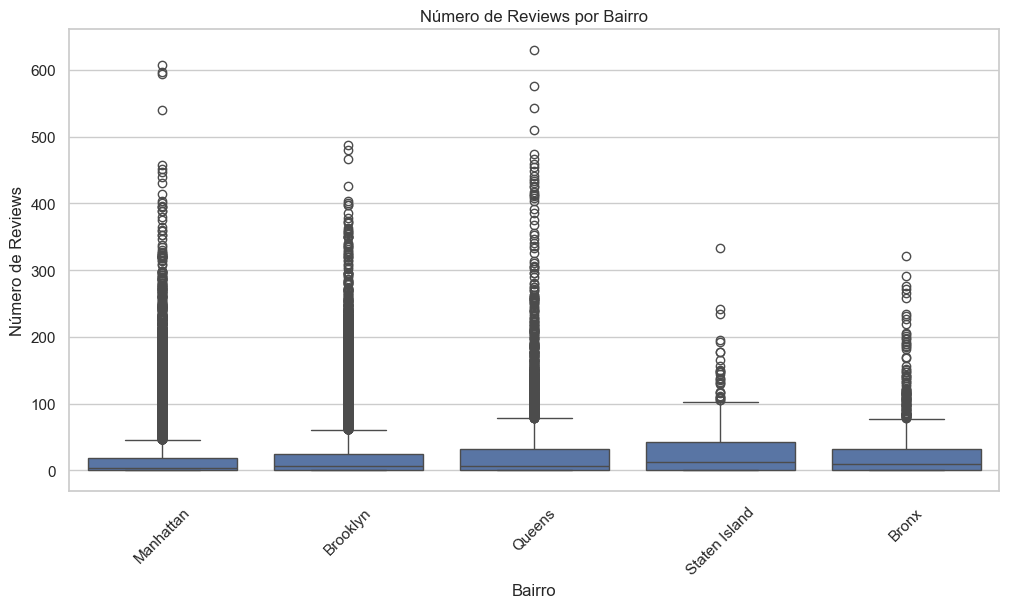

In [7]:

# Relação entre Localização e Número de Reviews
plt.figure(figsize=(12, 6))
sns.boxplot(x='bairro_group', y='numero_de_reviews', data=df)
plt.title('Número de Reviews por Bairro')
plt.xlabel('Bairro')
plt.ylabel('Número de Reviews')
plt.xticks(rotation=45)
plt.show()

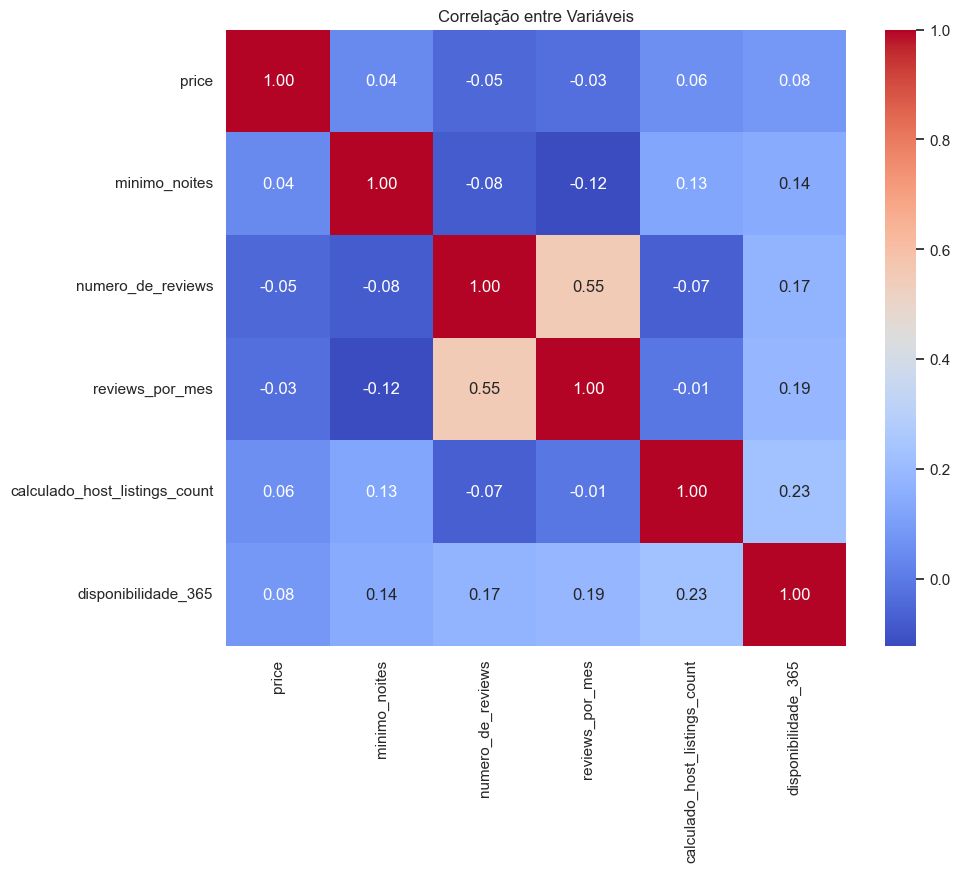

In [8]:
# Correlação entre variáveis
correlacao = df[['price', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 'calculado_host_listings_count', 'disponibilidade_365']].corr()

# Heatmap de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre Variáveis')
plt.show()

---

### Respostas às Perguntas Específicas



#### a. Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

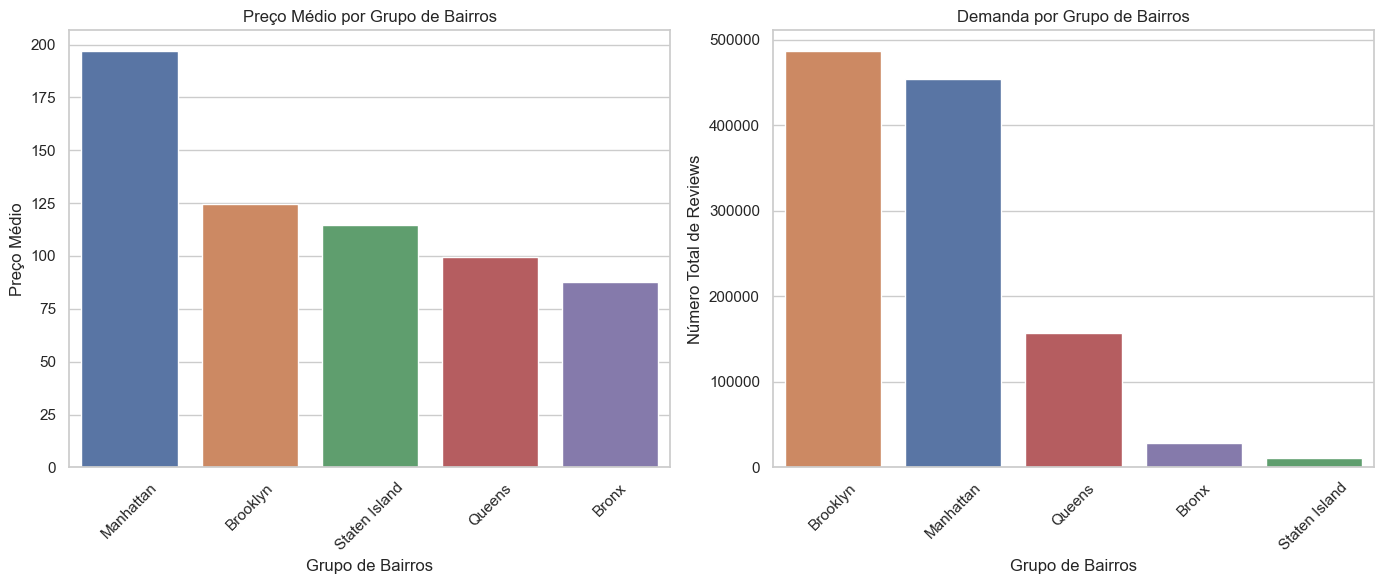

,Preco_Medio,Total_Reviews
bairro_group,,
Bronx,87.496792,28371
Brooklyn,124.381983,486565
Manhattan,196.875814,454569
Queens,99.517649,156950
Staten Island,114.812332,11541


In [9]:

# Análise da localização mais indicada para compra baseada em preço médio e demanda

# Calcular Preço médio por bairro_group
preco_medio_bairro_group = df.groupby('bairro_group')['price'].mean().sort_values(ascending=False)

# Calcular Número total de reviews por bairro_group como indicador de demanda
demanda_bairro_group = df.groupby('bairro_group')['numero_de_reviews'].sum().sort_values(ascending=False)

# Plotando os resultados
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=preco_medio_bairro_group.index, y=preco_medio_bairro_group.values, hue=preco_medio_bairro_group.index, hue_order=preco_medio_bairro_group.index.tolist())
plt.title('Preço Médio por Grupo de Bairros')
plt.xlabel('Grupo de Bairros')
plt.ylabel('Preço Médio')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=demanda_bairro_group.index, y=demanda_bairro_group.values, hue=demanda_bairro_group.index, hue_order=preco_medio_bairro_group.index.tolist())
plt.title('Demanda por Grupo de Bairros')
plt.xlabel('Grupo de Bairros')
plt.ylabel('Número Total de Reviews')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()




# Juntar as duas análises em um único DataFrame para comparação
bairro_analysis = pd.DataFrame({
    'Preco_Medio': preco_medio_bairro_group,
    'Total_Reviews': demanda_bairro_group
})

bairro_analysis


Conclusões: 
* **Preço Médio por Grupo de Bairros**: Alguns grupos de bairros possuem um preço médio mais elevado do que outros, o que pode indicar áreas com maior valorização ou com apartamentos de características superiores. A visualização mostra a variação dos preços médios entre os diferentes grupos de bairros.

* **Demanda por Grupo de Bairros**: A demanda, indicada pelo número total de reviews, varia significativamente entre os grupos de bairros. Bairros com mais reviews podem indicar maior popularidade ou maior volume de alugueis, sugerindo uma alta procura por acomodações nessas áreas.

* **Recomendação para Investimento**: Para investir em um apartamento para alugar na plataforma, considerar os grupos de bairros que apresentam um equilíbrio entre um alto preço médio (indicativo de valorização) e uma alta demanda (indicativo de popularidade e procura). Bairros que se destacam em ambas as métricas seriam mais indicados para a compra, pois sugerem uma combinação de boa rentabilidade com alta taxa de ocupação.

Segundo os insights abaixo:

* Manhattan tem o preço médio mais alto ($196.87) e uma alta demanda (454,569 avaliações).
* Brooklyn segue com um preço médio de $124.38 e a demanda mais alta entre todos os bairros (486,565 avaliações).
* Queens e Staten Island apresentam preços médios mais acessíveis, $99.52 e $114.81 respectivamente, com Queens tendo uma demanda significativamente maior (156,950 avaliações) comparado a Staten Island (11,541 avaliações).
* Bronx tem o preço médio mais baixo ($87.50) e uma demanda relativamente baixa (28,371 avaliações).

Conclui-se que, para um investimento em apartamento para alugar na plataforma, Manhattan seria a localização mais indicada se o foco for maximizar o retorno por noite, dada a alta demanda e o preço médio mais elevado. Entretanto, Brooklyn também pode ser considerado uma boa opção, oferecendo uma combinação de demanda alta com preços médios significativos, possivelmente oferecendo um equilíbrio entre custo de investimento e retorno.

#### b. O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

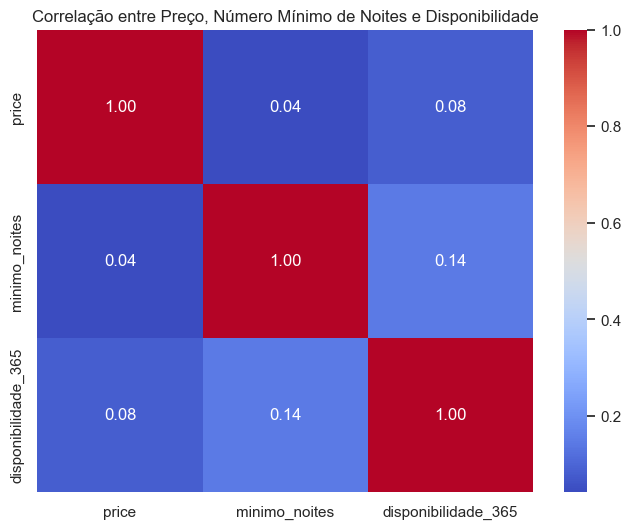

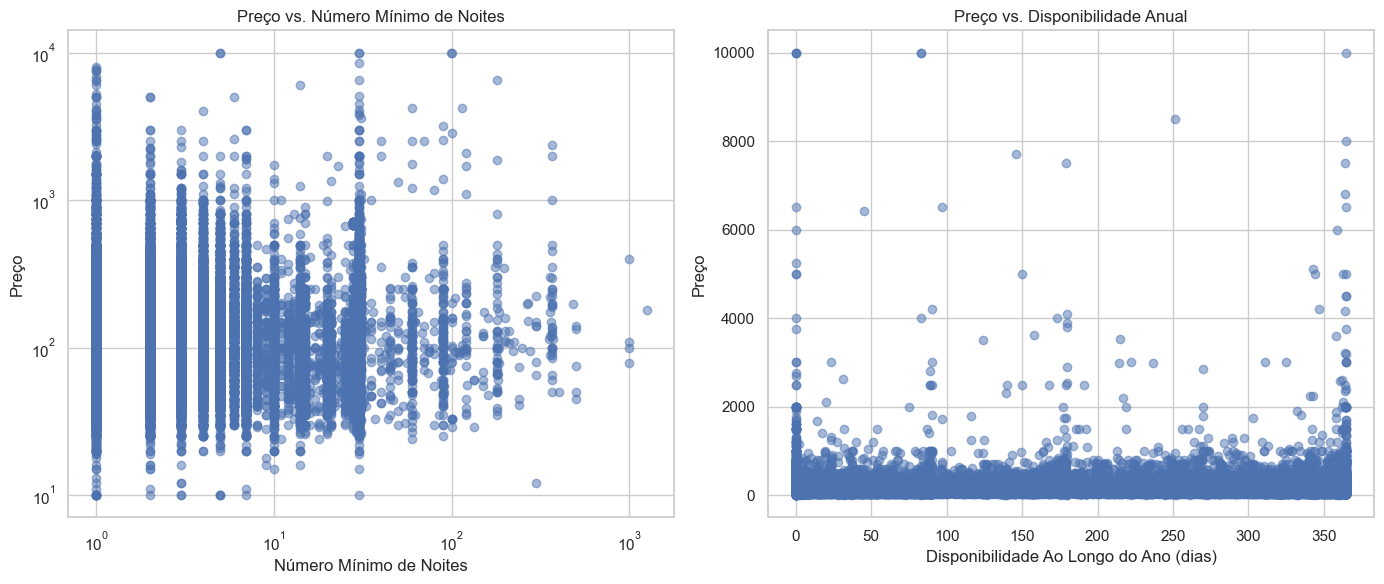

In [10]:
# Análise da relação entre preço e número mínimo de noites, e preço e disponibilidade ao longo do ano

# Correlação entre preço, número mínimo de noites e disponibilidade ao longo do ano
correlation_matrix = df[['price', 'minimo_noites', 'disponibilidade_365']].corr()

# Visualização da correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre Preço, Número Mínimo de Noites e Disponibilidade')
plt.show()

# Scatter plots para visualizar as relações
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['minimo_noites'], df['price'], alpha=0.5)
plt.title('Preço vs. Número Mínimo de Noites')
plt.xlabel('Número Mínimo de Noites')
plt.ylabel('Preço')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(df['disponibilidade_365'], df['price'], alpha=0.5)
plt.title('Preço vs. Disponibilidade Anual')
plt.xlabel('Disponibilidade Ao Longo do Ano (dias)')
plt.ylabel('Preço')
plt.grid(True)

plt.tight_layout()
plt.show()


Conclusões: 
* **Correlação entre Preço, Número Mínimo de Noites e Disponibilidade**: A matriz de correlação mostra que a correlação entre o preço e o número mínimo de noites, assim como entre o preço e a disponibilidade ao longo do ano, é relativamente baixa. Isso sugere que, embora possa haver alguma relação, ela não é forte.

* **Preço vs. Número Mínimo de Noites**: A visualização em escala logarítmica indica que, apesar da variação de preços, não há uma tendência clara que sugira que o número mínimo de noites tenha uma influência direta e significativa sobre o preço. Alguns aluguéis com número mínimo de noites alto têm preços variados, assim como aqueles com requisitos de noites mais baixos. Os proprietários parecem definir o número mínimo de noites com base em preferências pessoais ou estratégias de gerenciamento, que podem não estar diretamente relacionadas ao valor do aluguel.

* **Preço vs. Disponibilidade Ao Longo do Ano**: A relação entre preço e disponibilidade ao longo do ano também não mostra uma tendência clara. Existem propriedades com alta disponibilidade ao longo do ano em diferentes faixas de preço, assim como propriedades com baixa disponibilidade.


Baseado nos dados analisados, tanto o número mínimo de noites quanto a disponibilidade ao longo do ano têm impacto muito limitado no preço. Isso sugere que outros fatores, possivelmente como localização, tipo de quarto, e reputação do anfitrião (indicada pelo número de avaliações), podem ser mais determinantes para o preço de um anúncio na plataforma.



#### c. Existe algum padrão no texto do nome do local para lugares de mais alto valor?

In [11]:
import warnings
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

data = pd.read_csv('teste_indicium_precificacao.csv')

# Definir o limiar de preço para o quartil superior
limiar_preco_quartil_superior = data['price'].quantile(0.75)

# Filtrar os anúncios com preço no quartil superior
anuncios_alto_valor = data[data['price'] > limiar_preco_quartil_superior].copy()

# Limpeza: Remover registros com nomes ausentes
anuncios_alto_valor_limpo = anuncios_alto_valor.dropna(subset=['nome'])

# Preparar o texto: converter para minúsculas
anuncios_alto_valor_limpo['nome'] = anuncios_alto_valor_limpo['nome'].str.lower()

# Utilizar CountVectorizer para extrair as palavras mais frequentes, ignorando stop words em inglês
vectorizer = CountVectorizer(stop_words='english', max_features=100)
X_limpo = vectorizer.fit_transform(anuncios_alto_valor_limpo['nome'])

# Sumarizar a frequência das palavras e ordenar
palavras_frequentes = np.array(vectorizer.get_feature_names_out())
frequencias = X_limpo.sum(axis=0).A1
index_freq = frequencias.argsort()[::-1]
palavras_frequentes_ordenadas = palavras_frequentes[index_freq]
frequencias_ordenadas = frequencias[index_freq]

# Exibir as 10 palavras mais frequentes
palavras_frequentes_df = pd.DataFrame({
    'Palavra': palavras_frequentes_ordenadas[:10],
    'Frequencia': frequencias_ordenadas[:10]
})  
print(palavras_frequentes_df)


# Suprimir todos os avisos durante a execução do notebook
warnings.filterwarnings('ignore')

     Palavra  Frequencia
0    bedroom        1916
1  apartment        1802
2        apt        1481
3    village        1070
4     studio        1021
5       east        1004
6     luxury         950
7       park         913
8       loft         891
9   spacious         877


C:\Users\felip\AppData\Local\Temp\ipykernel_109208\2374184934.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anuncios_alto_valor_limpo['nome'] = anuncios_alto_valor_limpo['nome'].str.lower()


Conclusões: 

A partir dos resultados obtidos, observamos que as palavras mais frequentes nos nomes dos anúncios com preços acima do quartil superior incluem termos que sugerem características desejáveis em acomodações, tais como:

* "_bedroom_": Indicando o número de quartos, um fator importante para potenciais locatários.
* "_apartment_" e "_apt_": Refletindo o tipo de propriedade oferecida.
* "_luxury_": Sugerindo que o imóvel tem características de luxo.
* "_spacious_": Indicando que o espaço é amplo, um atributo valorizado por muitos locatários.
* "_studio_", "_loft_": Tipos específicos de acomodações que podem ser atraentes para certos segmentos de mercado.
* "_village_", "_east_", "_park_": Palavras que podem se referir à localização ou proximidade a áreas desejáveis.
Essas palavras sinalizam características específicas dos imóveis que são enfatizadas nos anúncios de maior valor, sugerindo que locatários estão dispostos a pagar mais por imóveis que ofereçam esses atributos. Propriedades descritas como espaçosas, de luxo, ou localizadas em áreas desejáveis, tendem a ser listadas com preços mais altos.

Essa análise de texto dos nomes dos anúncios revelou que anúncios de alto valor frequentemente incluem palavras que destacam o tamanho, o luxo, o tipo de propriedade e a localização. Esses fatores parecem ser significativos na determinação do valor percebido de um imóvel para aluguel temporário. A existência dessas palavras nos nomes dos anúncios sugere uma estratégia dos donos para atrair locatários, destacando as características mais valorizadas e justificando preços mais altos. Portanto, anúncios que enfatizam essas qualidades tendem a ser posicionados como opções mais _premium_ no mercado.

---

### Previsão do Preço a partir dos dados

#### Tipo de Problema
Trata-se de um problema de **regressão**, uma vez que o objetivo é prever um valor contínuo (o preço do aluguel). A regressão é apropriada aqui devido à natureza quantitativa e contínua do preço, permitindo modelar a relação entre as variáveis independentes (características dos aluguéis) e a variável dependente (preço).

#### Etapas

Para realizar a previsão do preço a partir dos dados, realizo as seguintes etapas:

* **Transformação de Variáveis Categóricas**: Aplica _one-hot encoding_ nas variáveis categóricas `room_type` e `bairro_group`, que, pela EDA, são prováveis preditores importantes para o preço. Essa técnica transforma cada categoria em uma nova coluna binária, permitindo que o modelo utilize essas informações.

    * **_One-Hot Encoding_**: É uma técnica utilizada para lidar com variáveis categóricas, que são aquelas que possuem um conjunto limitado de valores possíveis. Em vez de representar as categorias diretamente como números, o _One-Hot Encoding_ cria uma nova coluna para cada categoria única e atribui um valor binário (0 ou 1) para indicar a presença ou ausência dessa categoria em cada observação. Isso evita que o modelo interprete erroneamente as categorias como ordinais ou com pesos específicos, garantindo uma representação adequada das variáveis categóricas no modelo.

* **Análise e Tratamento de _Outliers_**: Investiga-se a distribuição dos preços para identificar e tratar outliers, o que pode melhorar a performance do modelo.
    * **_Outliers_**: São pontos de dados que se desviam significativamente do padrão geral dos dados. Eles podem ser causados por erros de medição, processos incomuns ou eventos raros, e podem distorcer a análise estatística e os modelos de _machine learning_. Nesse caso dos aluguéis, a remoção de _outliers_ do preço é uma etapa importante para garantir que o modelo não seja influenciado por valores extremamente altos que podem distorcer as previsões.

* **Seleção e Treinamento de Modelo**: A modelagem utiliza um modelo de Random Forest Regressor, que é conhecido por ser versátil, capaz de capturar interações complexas entre as variáveis, e geralmente funciona bem para problemas de regressão sem a necessidade de extensivo tuning inicial.

* **Avaliação do Modelo**: São utilizadas métricas comuns de **regressão**, como **MSE (Erro Quadrático Médio)**, **RMSE (Raíz do Erro Quadrático Médio)** e **R² (Coeficiente de Determinação)**,  para avaliar a performance do modelo.

    * **MSE (Erro Quadrático Médio)**: Média dos quadrados dos erros entre os valores previstos pelo modelo e os valores reais. Um valor menor indica um modelo mais preciso.

    * **R² (Coeficiente de Determinação)**: Indica a proporção da variância na variável dependente que é previsível a partir das variáveis independentes. Varia de 0 a 1, onde valores mais próximos de 1 indicam um modelo com melhor ajuste aos dados.

    * **RMSE (Raíz do Erro Quadrático Médio)**: Mede a média da diferença entre os valores previstos pelo modelo e os valores reais, elevada ao quadrado, e em seguida, a raiz quadrada dessa média é calculada. Isso proporciona uma medida da dispersão dos erros de previsão. É escolhida como a principal medida de performance deste modelo por vários motivos:
        * **Interpretabilidade**: O RMSE é expresso na mesma unidade que a variável de destino (preço), tornando-o intuitivamente compreensível.

        * **Penalização de Erros Grandes**: Dá maior peso a erros maiores, o que é particularmente importante em um contexto imobiliário onde a precisão das previsões de preço é crítica. 

        * **Benchmarking**: Facilita a comparação da performance do modelo com outros modelos ou benchmarks do setor, oferecendo uma visão clara da eficácia do modelo.


#### Variáveis Utilizadas e Suas Transformações

As variáveis utilizadas na modelagem foram escolhidas com base na sua relevância para o preço do aluguel, bem como na disponibilidade de dados.

##### Variáveis Categóricas Transformadas via _One-Hot Encoding_

* `room_type`: Esta variável é crucial pois o tipo de quarto (por exemplo, quarto inteiro, quarto privado, quarto compartilhado) tem um impacto significativo no preço. Diferentes tipos de quartos tendem a ter diferentes faixas de preço devido à privacidade, espaço, e outros fatores.

* `bairro_group`: Vimos que a localização é um dos fatores mais importantes na determinação do preço de imóveis. Diferentes bairros têm diferentes níveis de demanda e características únicas, influenciando diretamente os preços.

##### Variáveis Numéricas

* `latitude` e `longitude`: As coordenadas geográficas ajudam a modelar a influência da localização exata dentro de um bairro no preço, capturando nuances além da classificação por bairro.

* `minimo_noites`: O número mínimo de noites pode afetar o preço, pois restrições mais longas podem reduzir a demanda, potencialmente afetando o preço de listagem.

* `numero_de_reviews`: Embora possa não ter uma relação direta óbvia com o preço, o número de avaliações pode indicar popularidade ou confiabilidade, afetando indiretamente a disposição dos hóspedes em pagar.

* `reviews_por_mes`, `calculado_host_listings_count`, `disponibilidade_365`: Essas variáveis podem fornecer insights adicionais sobre a atividade do anfitrião e a demanda pelo aluguel, influenciando potencialmente o preço.

##### Remoção de Outliers

Foquei em tratar _outliers_ no `price`, definindo um limite superior baseado na distribuição dos preços para remover valores extremamente altos que poderiam distorcer o modelo. 


#### Modelo _Random Forest Regressor_

O modelo _Random Forest Regressor_ cria várias árvores de decisão durante o treinamento e faz previsões tomando a média das previsões de todas as árvores. Isso ajuda a melhorar a precisão e controlar o _overfitting_. Cada árvore na floresta é construída a partir de uma amostra dos dados de treinamento (com substituição), conhecido como _bootstrapping_. Além disso, ao dividir um nó durante a construção da árvore, a seleção da melhor divisão é feita de um subconjunto aleatório de características, o que aumenta a diversidade entre as árvores.

##### Qual Modelo Melhor se Aproxima dos Dados ?
Embora o _Random Forest Regressor_ tenha sido escolhido como o modelo final para este projeto, é importante realizar comparações com outros modelos potenciais para assegurar que estamos utilizando a opção mais eficaz. Modelos comuns em tarefas de regressão incluem:

* **Regressão Linear**: Um modelo básico que pode servir como ponto de partida para a regressão. É fácil de interpretar e implementar, mas pode não capturar relações complexas entre as variáveis tão bem quanto modelos mais sofisticados.

* **Árvores de Decisão**: Podem capturar relações não-lineares e interações entre variáveis. São fáceis de interpretar, mas podem sofrer de overfitting se não forem adequadamente regularizadas.

* **_Gradient Boosting Machines (GBM)_**: Algoritmos como `XGBoost`, `LightGBM`, e `Gradient Boosting Regressor` são conhecidos por sua alta performance em competições de ciência de dados. Eles podem modelar relações complexas e não-lineares, mas podem ser mais difíceis de ajustar e interpretar em comparação com modelos mais simples.

Para este projeto, o _Random Forest Regressor_ se destaca como o modelo que melhor se aproxima dos dados devido à sua capacidade de lidar com a complexidade e variedade do dataset de aluguéis em Nova York. Ele é particularmente eficaz para:

* Lidar com variáveis categóricas transformadas via One-Hot Encoding sem a necessidade de redução de dimensionalidade.
* Modelar relações não-lineares e interações complexas entre variáveis.
* Ser robusto a outliers, o que é crucial dada a ampla gama de preços de aluguéis.


##### Prós

O _Random Forest Regressor_ é um algoritmo de aprendizado de máquina para **regressão** que opera construindo múltiplas árvores de decisão no momento do treinamento e produzindo a média das previsões das árvores individuais. Foi escolhido pelos seguintes motivos:

* **Robustez**: Ele é capaz de lidar bem com uma ampla gama de dados, incluindo variáveis categóricas e numéricas, sem a necessidade de escala prévia.

* **Menos propenso a _overfitting_**: Comparado a uma única árvore de decisão, o _Random Forest_ reduz o risco de _overfitting_ ao usar múltiplas árvores e o método de _bagging_.

* **Importância das Variáveis**: Fornece _insights_ úteis sobre quais variáveis são mais importantes para a previsão do preço.

* **Flexibilidade**: Pode ser facilmente ajustado para melhorar a performance através da otimização de hiperparâmetros.

##### Contras

* **Complexidade Computacional**: Pode ser computacionalmente intensivo, especialmente com um grande número de árvores ou um dataset muito grande.
* **Interpretabilidade**: Embora ofereça insights sobre a importância das variáveis, não é tão diretamente interpretável quanto modelos mais simples, como a regressão linear.
* **Ajuste de Hiperparâmetros**: Embora seja flexível, o ajuste fino de hiperparâmetros pode ser necessário para alcançar a performance ótima, o que pode ser um processo demorado e tecnicamente desafiador.


Portanto, o _Random Forest Regressor_ foi escolhido por equilibrar eficácia, robustez e uma relativa facilidade de uso, tornando-o adequado para o dataset deste projeto. A seleção desse modelo é justificada pela complexidade dos dados e pelo objetivo de capturar as nuances dos preços de aluguéis em Nova York com uma boa precisão.

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Carregamento e preparação do dataset
df = pd.read_csv('teste_indicium_precificacao.csv')
ohe = OneHotEncoder(handle_unknown='ignore')
cat_features = ohe.fit_transform(df[['room_type', 'bairro_group']])
cat_feature_names = ohe.get_feature_names_out(['room_type', 'bairro_group'])
cat_features_df = pd.DataFrame(cat_features.toarray(), columns=cat_feature_names) # Convertendo para DataFrame

# Remoção de outliers e tratamento de NaN
q1, q3 = np.percentile(df['price'], [25, 75])
iqr = q3 - q1
upper_bound = q3 + (1.5 * iqr)
df_filtered = df[df['price'] <= upper_bound]

# Calcular a mediana apenas das colunas numéricas
median_values = df_filtered.select_dtypes(include=[np.number]).median()

# Aplicar fillna somente com as medianas das colunas numéricas
df_filtered = df_filtered.fillna(median_values)

df_final = pd.concat([df_filtered.reset_index(drop=True), cat_features_df.iloc[:len(df_filtered)].reset_index(drop=True)], axis=1)

# Modelagem
X = df_final.drop(['id', 'nome', 'host_id', 'host_name', 'bairro_group', 'bairro', 'room_type', 'price', 'ultima_review'], axis=1)
y = df_final['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Avaliação
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}, RMSE: {rmse}, R²: {r2}")


MSE: 3074.083880304845, RMSE: 55.44442154360387, R²: 0.3371404234884453


#### Conclusões

O modelo de *Random Forest Regressor* treinado obteve um **RMSE (Root Mean Squared Error)** de aproximadamente 55.27. Isso significa que, em média, as previsões do modelo desviam cerca de $55.27 do preço real das listagens. Este valor fornece uma medida inicial de quão bem o modelo está performando.

In [13]:
# Supondo que ohe (OneHotEncoder) e rf_model (RandomForestRegressor) já estão treinados conforme seu código fornecido.

# Nova entrada para predição
nova_entrada = {
 'room_type': 'Entire home/apt',
 'bairro_group': 'Manhattan',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355
}

# Preparando a nova entrada para a predição
nova_entrada_df = pd.DataFrame([nova_entrada])  # Convertendo em DataFrame

# Aplicando OneHotEncoder nas variáveis categóricas
cat_features_nova_entrada = ohe.transform(nova_entrada_df[['room_type', 'bairro_group']]).toarray()

# Criando DataFrame para as variáveis categóricas codificadas
cat_features_nova_entrada_df = pd.DataFrame(cat_features_nova_entrada, columns=ohe.get_feature_names_out(['room_type', 'bairro_group']))

# Removendo as colunas 'room_type' e 'bairro_group' da nova entrada
nova_entrada_df = nova_entrada_df.drop(['room_type', 'bairro_group'], axis=1)

# Concatenando os recursos numéricos com os categóricos codificados
df_nova_entrada_final = pd.concat([nova_entrada_df, cat_features_nova_entrada_df], axis=1)

# Realizando a predição
preco_sugerido = rf_model.predict(df_nova_entrada_final)
print(f"Preço sugerido: ${preco_sugerido[0]}")


Preço sugerido: $196.52


#### Avaliação do Preço Sugerido
O preço real fornecido na nova entrada é de **$225**, enquanto o modelo sugeriu um preço de **$196.52**. A diferença de aproximadamente **$28.48** está dentro do **RMSE** de **$55.44**, o que significa que a predição está dentro do intervalo de erro esperado do modelo. Conclui-se então que a predição para essa entrada específica parece razoavelmente próxima do valor real.

#### Considerações
* **Adequação do Modelo**: As métricas indicam que há espaço para melhorias. O modelo atual pode não ser capaz de capturar todas as nuances que influenciam os preços dos imóveis ou aluguéis na área de interesse.

* **Complexidade dos Dados**: O mercado imobiliário é influenciado por muitos fatores, incluindo localização, tamanho, amenidades, e até fatores temporais como a temporada do ano. Seria útil revisar as features utilizadas no modelo e considerar a inclusão de mais variáveis que possam melhorar a precisão das predições.

* **Modelagem Adicional**: Experimentar com diferentes modelos, ajustar parâmetros, ou aplicar técnicas de engenharia de features pode ajudar a melhorar as métricas de desempenho.

Dado o contexto, o preço sugerido parece ser uma estimativa razoável dadas as limitações do modelo e de tempo do projeto. No entanto, para fins de precisão e confiabilidade maiores, seria benéfico explorar maneiras de aprimorar o modelo.

### Salvando o modelo em .pkl

In [14]:
import joblib

# Salvar o modelo em formato .pkl
joblib.dump(rf_model, 'modelo_random_forest.pkl')

print("Modelo salvo com sucesso!")


Modelo salvo com sucesso!


### Carregando o modelo salvo

In [15]:
import joblib

# Carregar o modelo salvo
modelo_carregado = joblib.load('modelo_random_forest.pkl')

# Nova entrada para predição (mesmo processo de preparação que você usou anteriormente)
nova_entrada = {
 'room_type': 'Entire home/apt',
 'bairro_group': 'Manhattan',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355
}

# Preparando a nova entrada para a predição
nova_entrada_df = pd.DataFrame([nova_entrada])  # Convertendo em DataFrame
cat_features_nova_entrada = ohe.transform(nova_entrada_df[['room_type', 'bairro_group']]).toarray()
cat_features_nova_entrada_df = pd.DataFrame(cat_features_nova_entrada, columns=ohe.get_feature_names_out(['room_type', 'bairro_group']))
nova_entrada_df = nova_entrada_df.drop(['room_type', 'bairro_group'], axis=1)
df_nova_entrada_final = pd.concat([nova_entrada_df, cat_features_nova_entrada_df], axis=1)

# Realizando a predição com o modelo carregado
preco_sugerido = modelo_carregado.predict(df_nova_entrada_final)
print(f"Preço sugerido pelo modelo carregado: ${preco_sugerido[0]}")


Preço sugerido pelo modelo carregado: $196.52
